In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('iris.csv')

In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=df.apply(le.fit_transform)

In [4]:
X=df.values

In [5]:
from scipy.spatial.distance import cdist
class KMeans:
    def __init__(self, k, max_iterations=100):
        self.k = k
        self.max_iterations = max_iterations
    def fit(self,X):
        self.centroids=X[np.random.choice(X.shape[0],self.k,replace=False),:]
        for i in range(self.max_iterations):
            distances=cdist(X,self.centroids)
            cluster_labels=np.argmin(distances, axis=1)
        for j in range(0,self.k):
            mask=cluster_labels==j
            if np.sum(mask)>0:
                self.centroids[j,:]=np.mean(X[mask,:],axis=0)
    def predict(self,X):
        distances=cdist(X,self.centroids)
        cluster_labels=np.argmin(distances,axis=1)
        return cluster_labels

In [6]:
kmeans = KMeans(k=3)
kmeans.fit(X)

In [7]:
labels = kmeans.predict(X)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2])

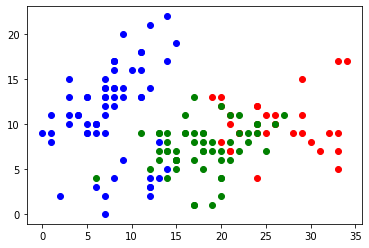

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X[labels==0,0],X[labels==0,1],c='red')
plt.scatter(X[labels==1,0],X[labels==1,1],c='Blue')
plt.scatter(X[labels==2,0],X[labels==2,1],c='green')
plt.show()

In [9]:
from sklearn.cluster import KMeans
def elbow_method(X):
    wcss = []
    for i in range(2, 11):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.plot(range(2, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()


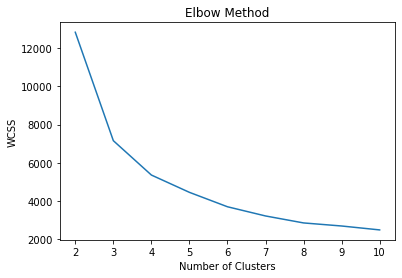

In [10]:
elbow_method(X)